<ipython-input-1-b7ae18d81c07>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


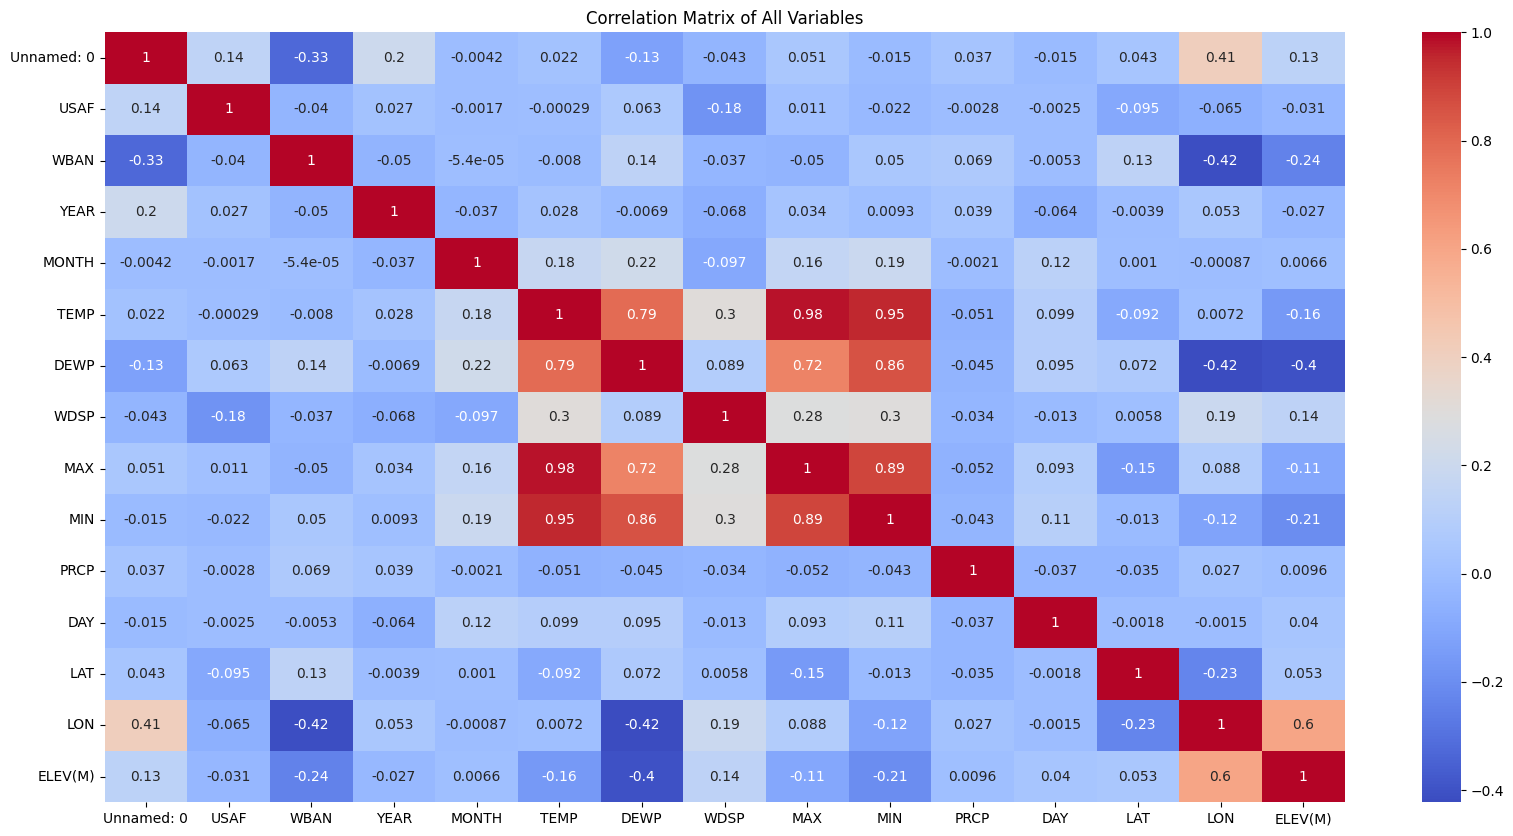

,Unnamed: 0,USAF,WBAN,YEAR,MONTH,TEMP,DEWP,WDSP,MAX,MIN,PRCP,DAY,LAT,LON,ELEV(M)
Unnamed: 0,1.000000,0.141086,-0.329780,0.203195,-0.004155,0.022248,-0.127480,-0.043064,0.050555,-0.014819,0.036682,-0.015058,0.043104,0.409839,0.127814
USAF,0.141086,1.000000,-0.039746,0.026944,-0.001663,-0.000295,0.062988,-0.179131,0.011345,-0.022072,-0.002762,-0.002456,-0.094896,-0.065077,-0.031104
WBAN,-0.329780,-0.039746,1.000000,-0.049590,-0.000054,-0.008041,0.135838,-0.036620,-0.049989,0.050166,0.068550,-0.005335,0.133339,-0.415866,-0.239928
YEAR,0.203195,0.026944,-0.049590,1.000000,-0.036752,0.028073,-0.006904,-0.067945,0.033795,0.009292,0.038758,-0.064287,-0.003899,0.053272,-0.027126
MONTH,-0.004155,-0.001663,-0.000054,-0.036752,1.000000,0.175706,0.221872,-0.096889,0.159683,0.189963,-0.002071,0.124119,0.001045,-0.000869,0.006640
TEMP,0.022248,-0.000295,-0.008041,0.028073,0.175706,1.000000,0.790503,0.303657,0.981683,0.951208,-0.050767,0.099212,-0.091904,0.007184,-0.157906
DEWP,-0.127480,0.062988,0.135838,-0.006904,0.221872,0.790503,1.000000,0.088653,0.721914,0.860996,-0.045077,0.095102,0.071884,-0.422676,-0.403443
WDSP,-0.043064,-0.179131,-0.036620,-0.067945,-0.096889,0.303657,0.088653,1.000000,0.283354,0.297361,-0.033697,-0.012524,0.005831,0.191271,0.135635
MAX,0.050555,0.011345,-0.049989,0.033795,0.159683,0.981683,0.721914,0.283354,1.000000,0.893032,-0.052352,0.092787,-0.154548,0.087768,-0.105819
MIN,-0.014819,-0.022072,0.050166,0.009292,0.189963,0.951208,0.860996,0.297361,0.893032,1.000000,-0.043436,0.106066,-0.013313,-0.120561,-0.205402


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
file_path = '/content/WashingtonWeather.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Statistical Summary
statistical_summary = df.describe()

# Plotting Correlation Matrix for all columns
correlation_matrix = df.corr()

# Plotting
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

# Output
correlation_matrix
# statistical_summary, correlation_matrix


In reviewing the correlation matrix for our dataset, we made a few key observations that guided our selection of features for the model.
We've settled on selecting 'YEAR', 'MIN', 'LAT', 'LON', 'ELEV(M)', 'TEMP', and 'DEWP' as the fields for our model. Here's the rationale behind our choices:

-  We noticed that TEMP and MAX exhibited a very high correlation of 0.98, indicating redundancy in information, so we chose only one of these to avoid multicollinearity in the model. 'TEMP' was included as it is a central variable in weather and climate studies, often serving as the primary indicator of energy balance and comfort level in environmental research.

- 'MIN' showed a high correlation with 'TEMP' and 'MAX', indicating it's a significant temperature measure. Since 'MAX' is not included, 'MIN' will provide a part of the temperature range that might be particularly relevant for capturing extreme conditions or daily temperature variations.

- 'YEAR' was chosen despite its weaker correlations because it could capture potential long-term trends or evolutionary patterns in the data that are not immediately apparent through correlation with other variables. This temporal component is crucial, especially if our analysis aims to understand changes over time or predict future trends.

- 'LAT' and 'LON' were selected because, even though their correlations with other variables were not strong, they are fundamental in any geographical or spatial analysis. These fields are essential for modeling the influence of location on our target variables, such as regional climate variations, which could be crucial for the predictive accuracy of our model.

- 'ELEV(M)' is an important feature because elevation has a well-known impact on various climatic factors, such as temperature and precipitation. The moderate correlation of 'ELEV(M)' with other variables suggests it has a non-negligible effect on the data, which justifies its inclusion.

- Lastly, 'DEWP', which represents dew point, is closely related to humidity and moisture levels. Its selection is based on its substantial correlation with 'TEMP', indicating that it carries additional valuable information for our model, potentially aiding in capturing a more comprehensive picture of the climatic conditions.

In choosing these fields, we aimed to balance the need to avoid multicollinearity with the desire to create a robust and informative model. These selected features encompass both the thermal characteristics of the dataset and the geographical nuances that could affect the target outcomes. By incorporating both temporal and spatial dimensions, along with key climatic variables, this selection strategy is intended to enhance the model's predictive power and provide deeper insights into the underlying patterns within the data.

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

The descriptive statistics for the key variables in the Washington Weather dataset are as follows:
*   YEAR: Ranges from 2000 to 2019, with an average around 2010.
*   MIN (Minimum Temperature): Varies from 10.2°F to 66.9°F, with an average of about 41.0°F.
*   LAT (Latitude): Ranges from 45.619 to 48.794, indicating the geographical spread of the data across different latitudes in Washington.
*   LON (Longitude): Extends from -124.555 to -117.528, covering a range of longitudes in the state.
*   ELEV(M) (Elevation in Meters): The elevation of the data points varies significantly from 3.7 meters to 1206.7 meters, with an average elevation of 265.2 meters.
*   TEMP (Temperature): The average temperature is around 50.6°F, ranging from 15.2°F to 83.4°F.
*   DEWP (Dew Point): Ranges from 10.95°F to 58.8°F, with an average of 39.78°F.

## Distribution of Key Variables

 Here we visualize the distribution of the key variables ('TEMP', 'DEWP', and 'MIN'), and analyze trends over the years to understand how these weather parameters have changed over time. We also examined the correlation between these variables.



### Distribution Plots:
Visualizes the distribution of key variables - Temperature (TEMP), Dew Point (DEWP), and Minimum Temperature (MIN). These histograms give an idea about the frequency and spread of these weather parameters.

### Trend Analysis:
Plots the trends over the years for each of these variables. These line plots help in understanding how these weather parameters have changed over time.

###Correlation Matrix:
Displays the correlation between TEMP, DEWP, and MIN. The heatmap provides a visual and numerical representation of how these variables are related to each other.

These visualizations and analyses were essential for a comprehensive understanding of the dataset's characteristics and for identifying any significant patterns or relationships within the data.

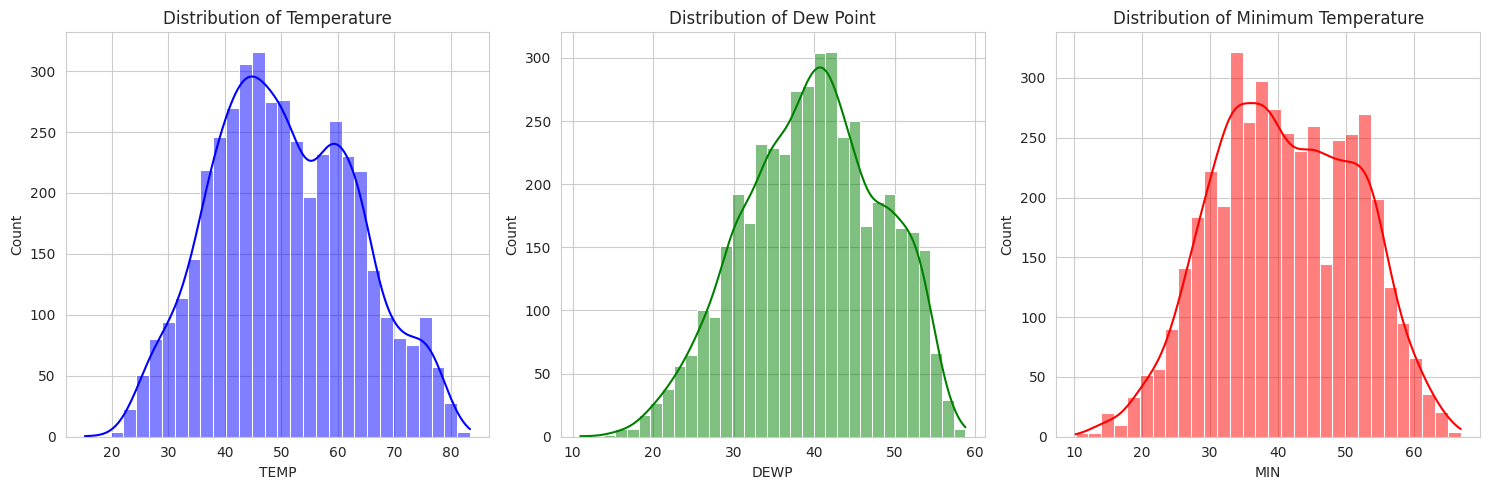

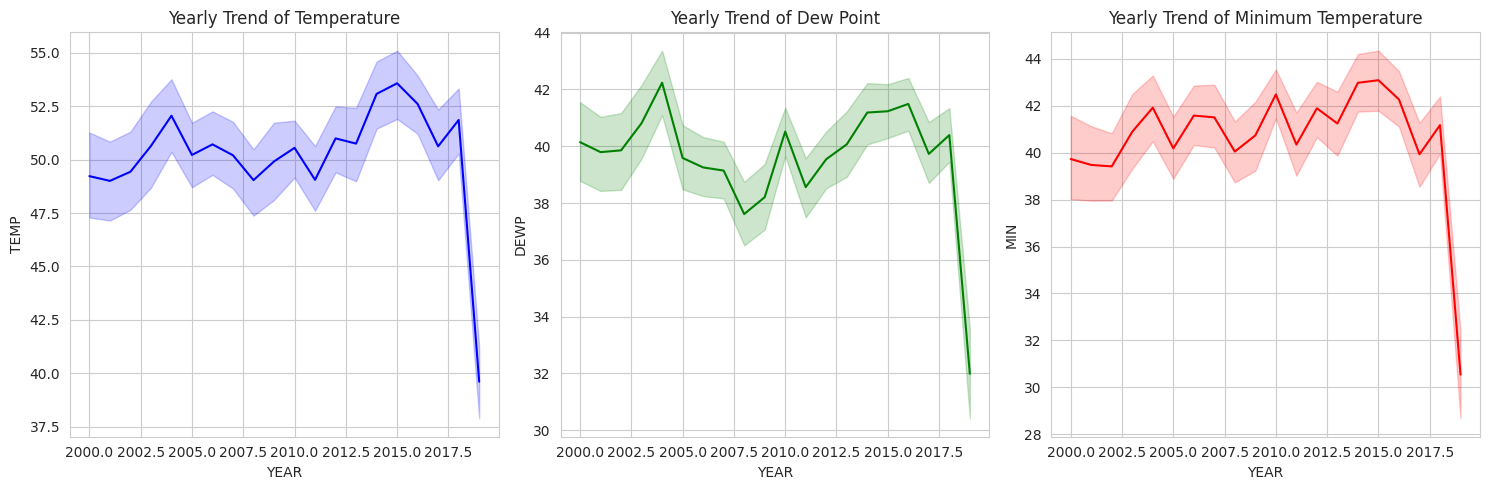

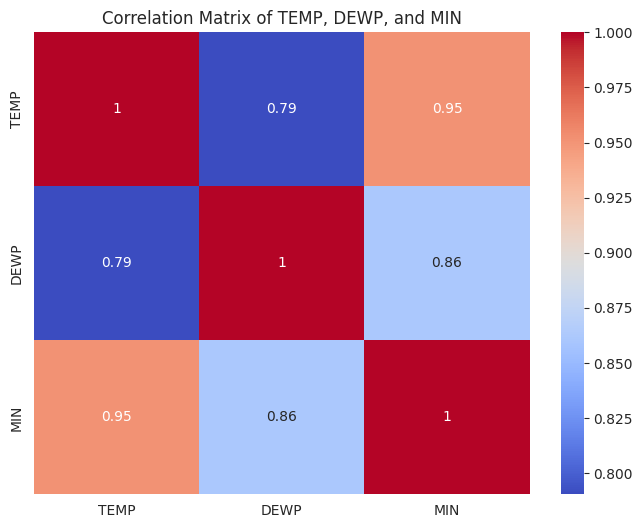

In [3]:
# Code for visualizing the distribution of key variables and analyzing trends over the years

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace 'your_file_path' with the actual path to the WashingtonWeather.csv file
file_path = '/content/WashingtonWeather.csv'
weather_data = pd.read_csv(file_path)


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of key variables: TEMP, DEWP, and MIN
plt.figure(figsize=(15, 5))

# Distribution of TEMP
plt.subplot(1, 3, 1)
sns.histplot(weather_data['TEMP'], kde=True, color='blue')
plt.title('Distribution of Temperature')

# Distribution of DEWP
plt.subplot(1, 3, 2)
sns.histplot(weather_data['DEWP'], kde=True, color='green')
plt.title('Distribution of Dew Point')

# Distribution of MIN
plt.subplot(1, 3, 3)
sns.histplot(weather_data['MIN'], kde=True, color='red')
plt.title('Distribution of Minimum Temperature')

plt.tight_layout()
plt.show()

# Plotting trends over the years for key variables
plt.figure(figsize=(15, 5))

# Trend of TEMP over the years
plt.subplot(1, 3, 1)
sns.lineplot(x='YEAR', y='TEMP', data=weather_data, color='blue')
plt.title('Yearly Trend of Temperature')

# Trend of DEWP over the years
plt.subplot(1, 3, 2)
sns.lineplot(x='YEAR', y='DEWP', data=weather_data, color='green')
plt.title('Yearly Trend of Dew Point')

# Trend of MIN over the years
plt.subplot(1, 3, 3)
sns.lineplot(x='YEAR', y='MIN', data=weather_data, color='red')
plt.title('Yearly Trend of Minimum Temperature')

plt.tight_layout()
plt.show()

# Correlation matrix between TEMP, DEWP, and MIN
correlation_matrix = weather_data[['TEMP', 'DEWP', 'MIN']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of TEMP, DEWP, and MIN')
plt.show()